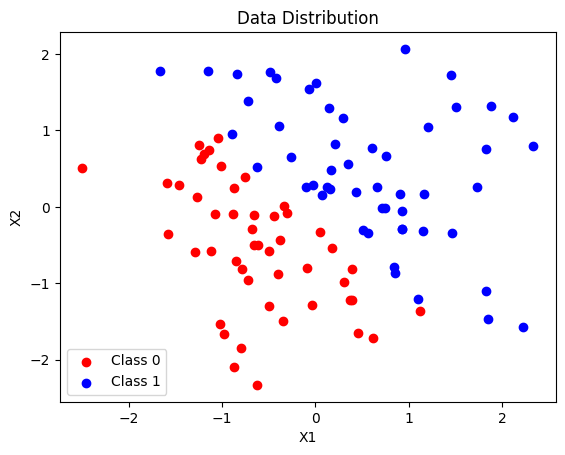

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate or load data
# Example: X = np.array([[x1, x2], ...]), y = np.array([0, 1, 0, 1, ...])
# Replace this with your dataset
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Visualize
plt.scatter(X_std[y == 0][:, 0], X_std[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_std[y == 1][:, 0], X_std[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Distribution')
plt.legend()
plt.show()


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [4]:
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [3]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = X.shape[0]
    loss_history = []

    for i in range(iterations):
        z = np.dot(X, weights)
        predictions = sigmoid(z)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        loss = cross_entropy_loss(y, predictions)
        loss_history.append(loss)

    return weights, loss_history


In [5]:
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5


In [7]:
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    weights = np.zeros(X_bias.shape[1])
    weights, loss_history = gradient_descent(X_bias, y, weights, learning_rate, iterations)
    return weights, loss_history


In [8]:
def evaluate(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [9]:
weights, loss_history = logistic_regression(X_std, y, learning_rate=0.1, iterations=1000)
y_pred = predict(np.hstack((np.ones((X_std.shape[0], 1)), X_std)), weights)

print("Accuracy:", evaluate(y, y_pred))
print("Final Loss:", loss_history[-1])


Accuracy: 0.99
Final Loss: 0.10655221119377495


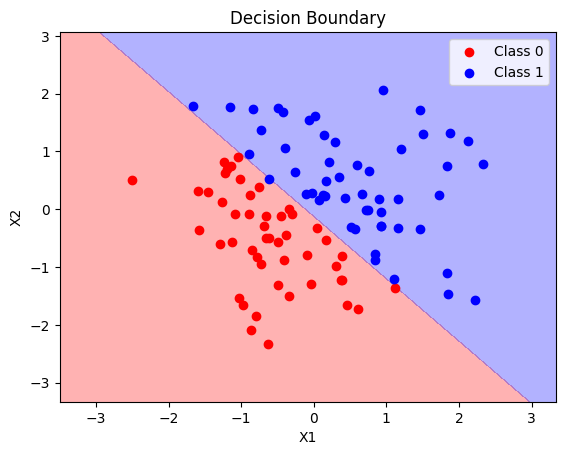

In [10]:
def plot_decision_boundary(X, y, weights):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[np.ones((xx.size, 1)), xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, weights)).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['red', 'blue'])
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Decision Boundary")
    plt.legend()
    plt.show()

plot_decision_boundary(X_std, y, weights)
